In [128]:
import pandas as pd

In [129]:
iris = pd.read_csv("iris.csv")
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [130]:
iris_setosa = iris[iris['variety']=='Setosa']
iris_versicolor = iris[iris['variety']=='Versicolor'] 
iris_virginica = iris[iris['variety']=='Virginica']   

print(iris_setosa.head()) 
print(iris_versicolor.head())
print(iris_virginica.head()) 


   sepal_length  sepal_width  petal_length  petal_width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
    sepal_length  sepal_width  petal_length  petal_width     variety
50           7.0          3.2           4.7          1.4  Versicolor
51           6.4          3.2           4.5          1.5  Versicolor
52           6.9          3.1           4.9          1.5  Versicolor
53           5.5          2.3           4.0          1.3  Versicolor
54           6.5          2.8           4.6          1.5  Versicolor
     sepal_length  sepal_width  petal_length  petal_width    variety
100           6.3          3.3           6.0          2.5  Virginica
101           5.8          2.7           5.1          1.9  Virgi

Text(0, 0.5, 'Length/Width (mm)')

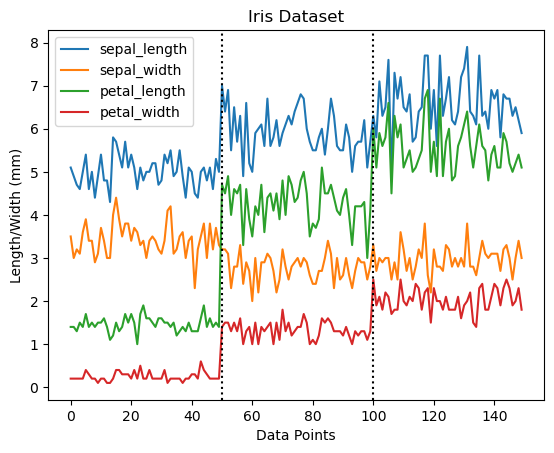

In [131]:
# default plot is a line chart
ax = iris.plot() # assign to variable ax 
ax.axvline(x=50, color = "black", ls = ":")
ax.axvline(x=100, color = "black", ls = ":")
# Use ax to add titles and labels
ax.set_title("Iris Dataset")
ax.set_xlabel("Data Points")
ax.set_ylabel("Length/Width (mm)")

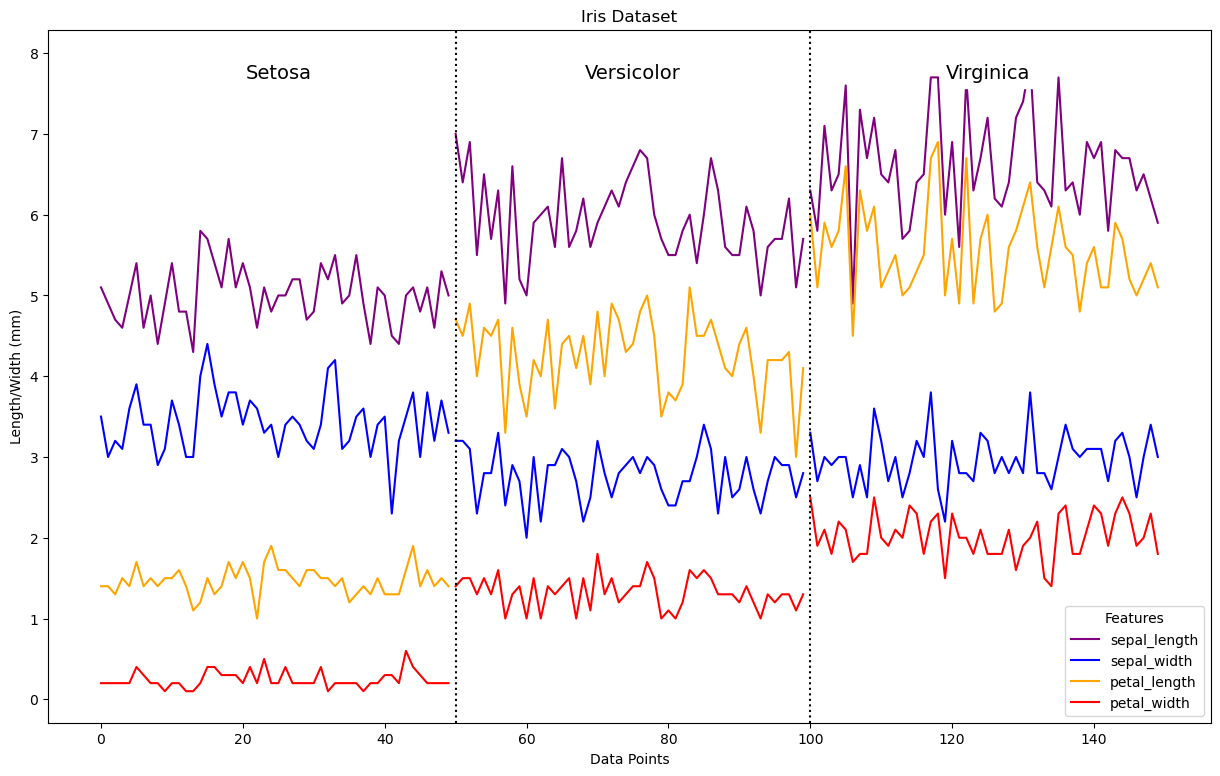

In [132]:
import matplotlib.pyplot as plt

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
colors = ['purple', 'blue', 'orange', 'red'] 

fig, ax = plt.subplots(figsize=(15, 9))

for i, feature in enumerate(features):
    iris_setosa[feature].plot(ax=ax, color=colors[i], label=feature)
    iris_versicolor[feature].plot(ax=ax, color=colors[i], label='')
    iris_virginica[feature].plot(ax=ax, color=colors[i], label='')

ax.axvline(x=50, color="black", ls=":")
ax.axvline(x=100, color="black", ls=":")

ax.text(25, ax.get_ylim()[1] * 0.95, 'Setosa', ha='center', va='top', fontsize=14, backgroundcolor='white')
ax.text(75, ax.get_ylim()[1] * 0.95, 'Versicolor', ha='center', va='top', fontsize=14, backgroundcolor='white')
ax.text(125, ax.get_ylim()[1] * 0.95, 'Virginica', ha='center', va='top', fontsize=14, backgroundcolor='white')
ax.set_title("Iris Dataset")
ax.set_xlabel("Data Points")
ax.set_ylabel("Length/Width (mm)")
ax.legend(title='Features', loc="lower right")

plt.show()

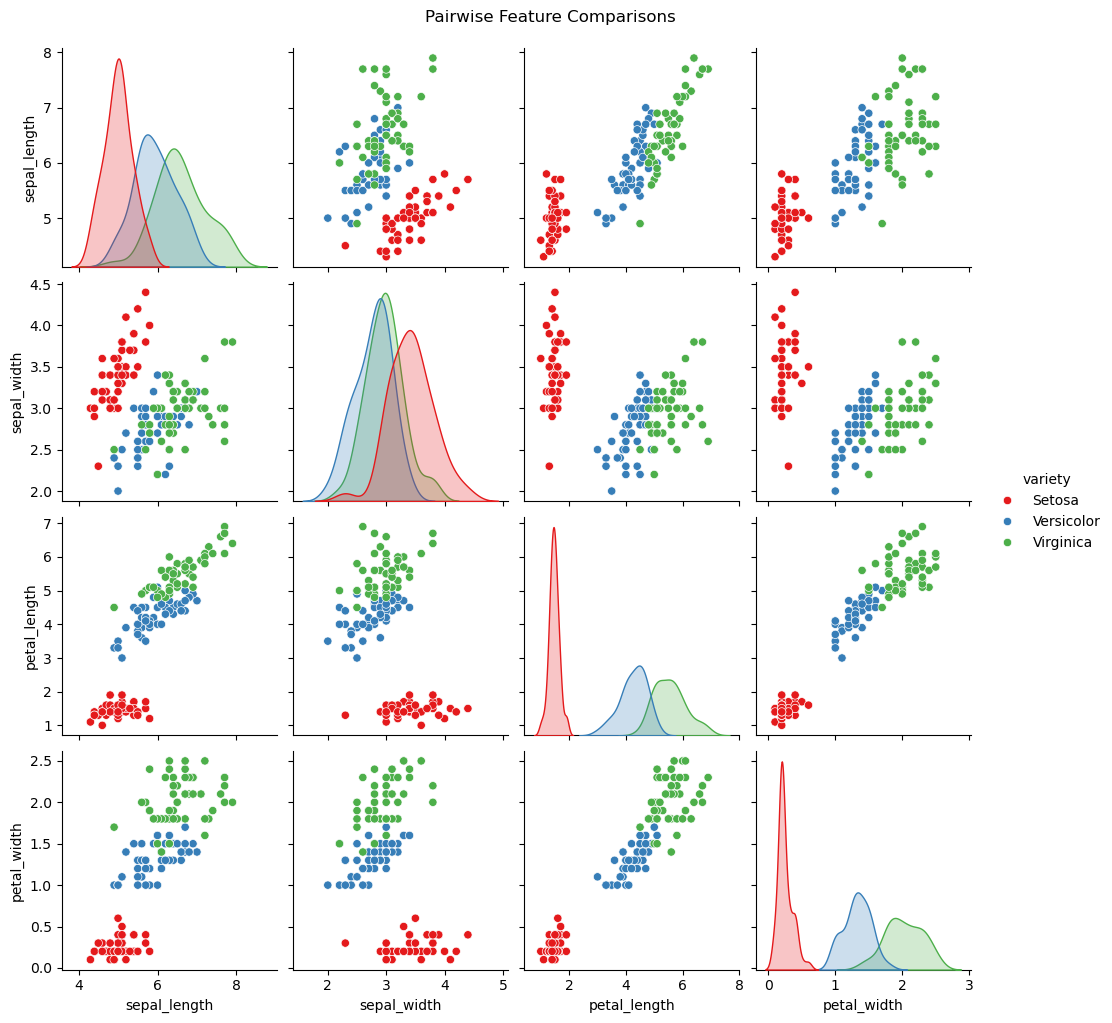

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(iris, hue='variety', palette='Set1')
plt.suptitle("Pairwise Feature Comparisons", y=1.02)
plt.show()

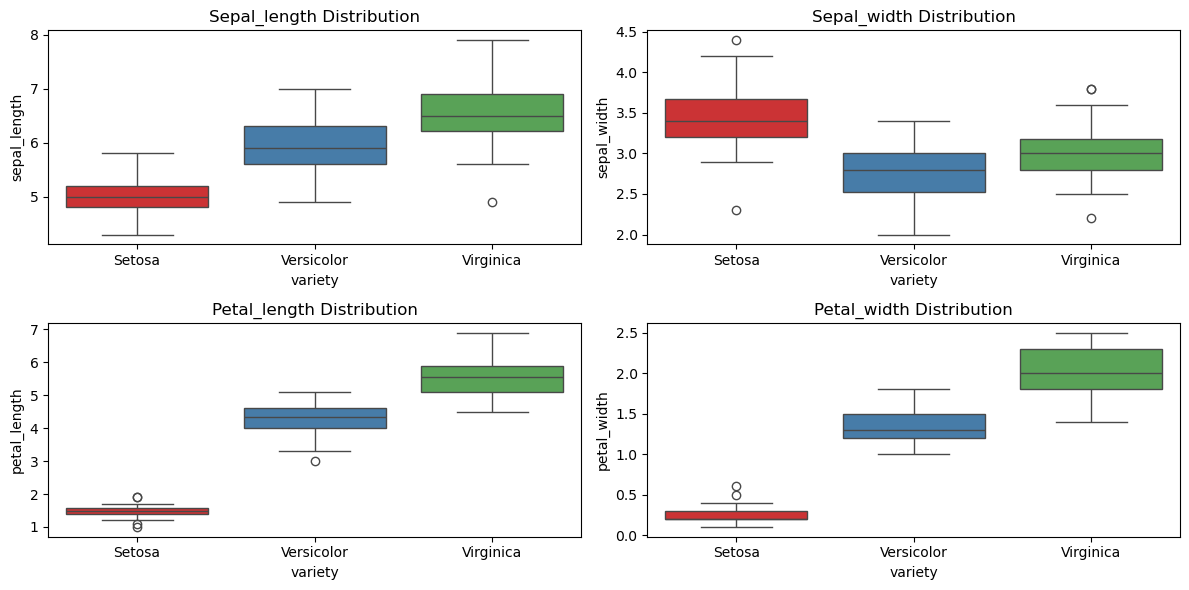

In [134]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='variety', y=feature, data=iris, palette='Set1', hue='variety')
    plt.title(f'{feature.capitalize()} Distribution')
plt.tight_layout()
plt.show()

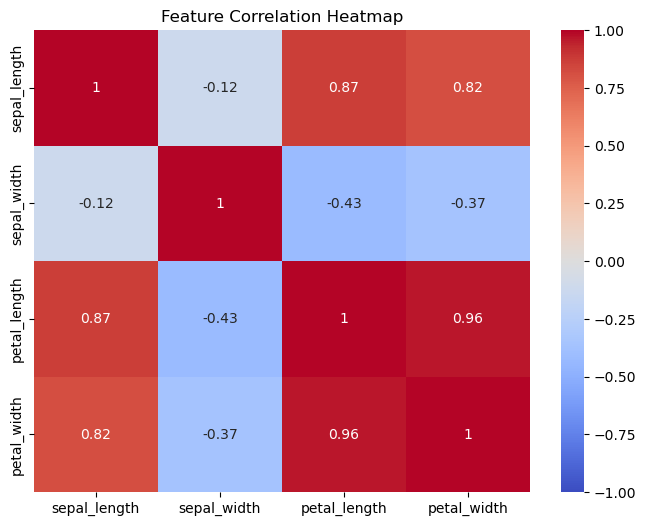

In [135]:
plt.figure(figsize=(8, 6))
sns.heatmap(iris[features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

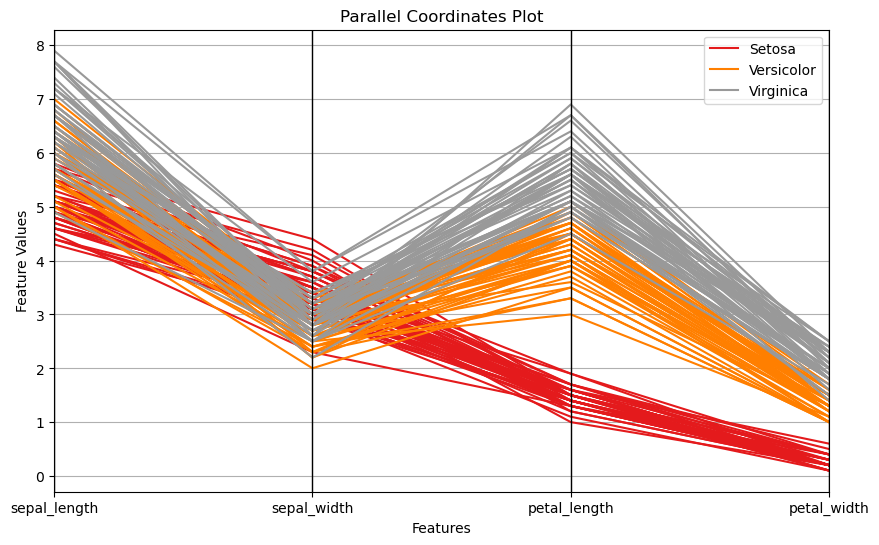

In [136]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10, 6))
parallel_coordinates(iris, 'variety', colormap='Set1')
plt.title("Parallel Coordinates Plot")
plt.xlabel("Features")
plt.ylabel("Feature Values")
plt.show()

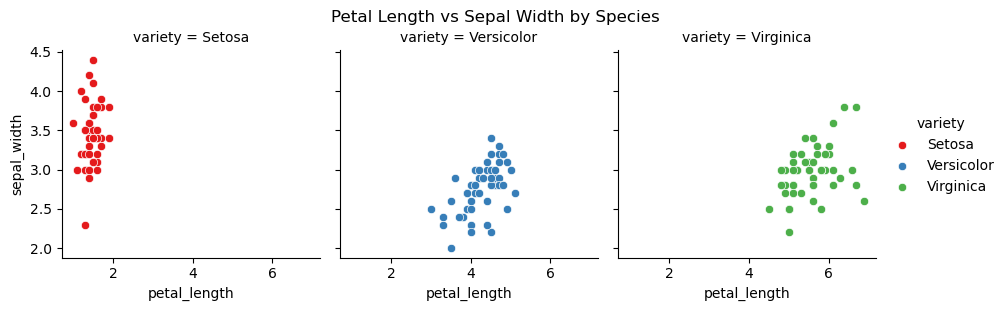

In [150]:
g = sns.FacetGrid(iris, col='variety', hue='variety', palette='Set1')
g.map(sns.scatterplot, 'petal_length', 'sepal_width')
g.add_legend()
plt.suptitle("Petal Length vs Sepal Width by Species", y=1.02)
plt.show()

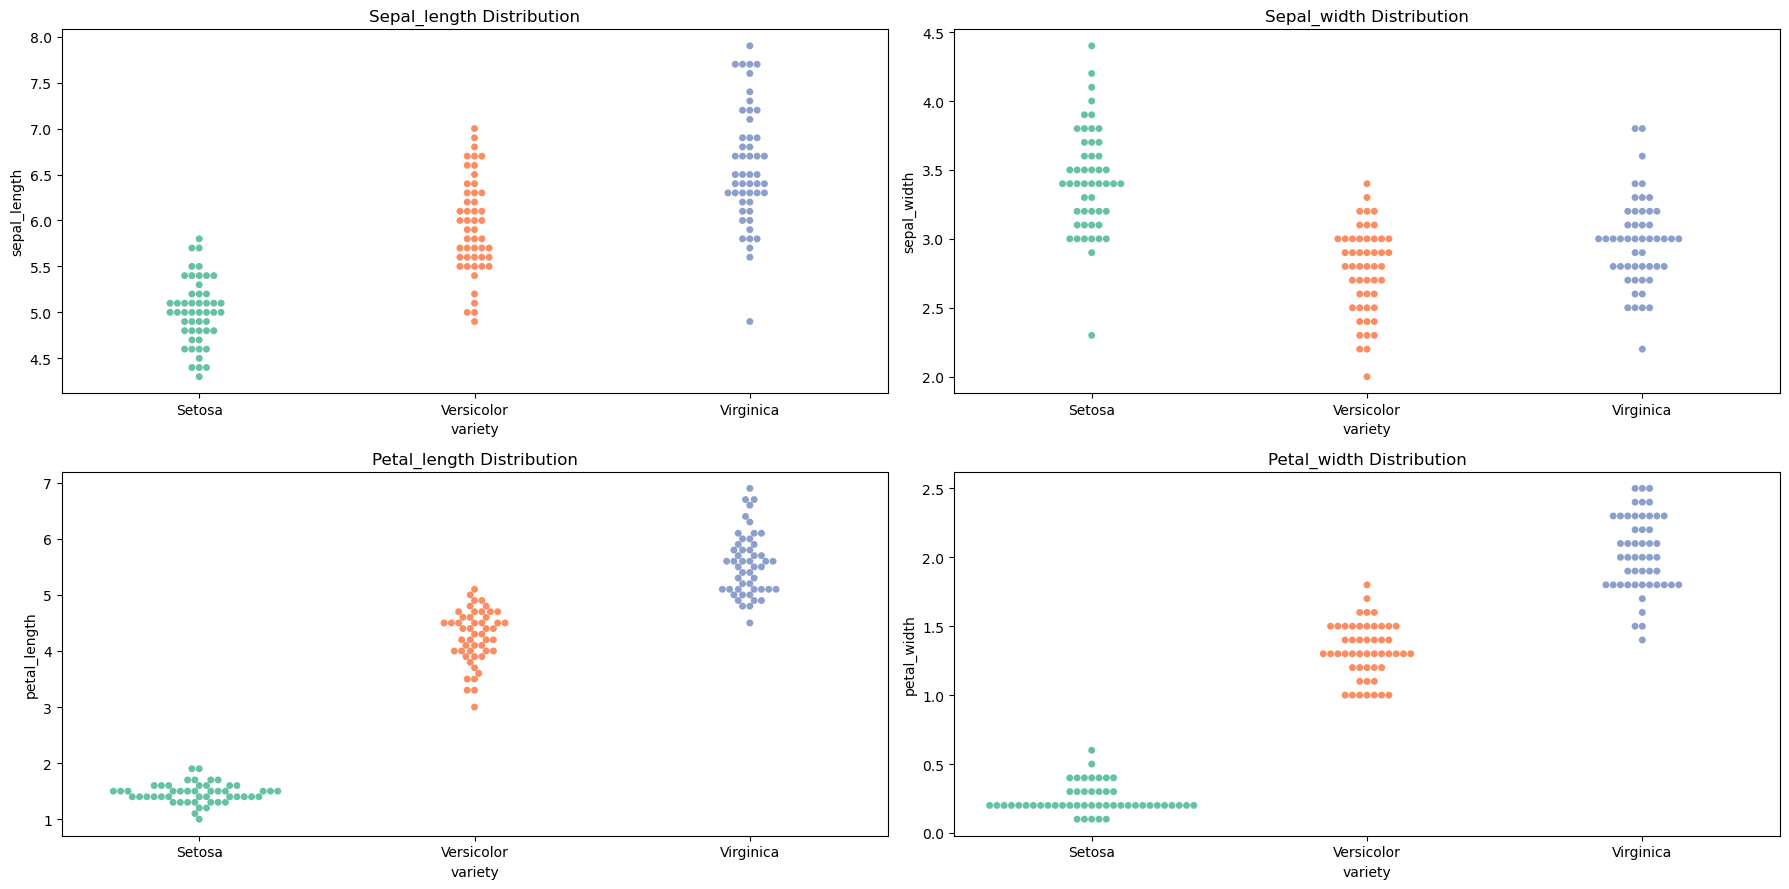

In [138]:
plt.figure(figsize=(18, 9))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.swarmplot(x='variety', y=feature, data=iris, palette='Set2', hue='variety')
    plt.title(f'{feature.capitalize()} Distribution')
plt.tight_layout()
plt.show()

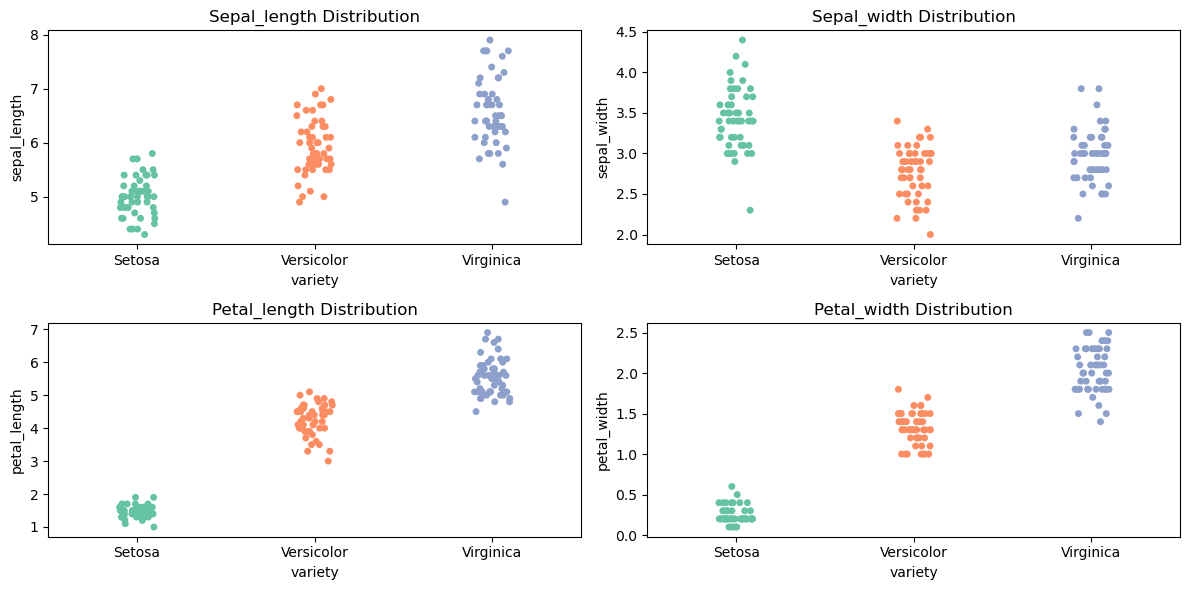

In [139]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.stripplot(x='variety', y=feature, data=iris, palette='Set2', hue= 'variety', jitter=True)
    plt.title(f'{feature.capitalize()} Distribution')
plt.tight_layout()
plt.show()

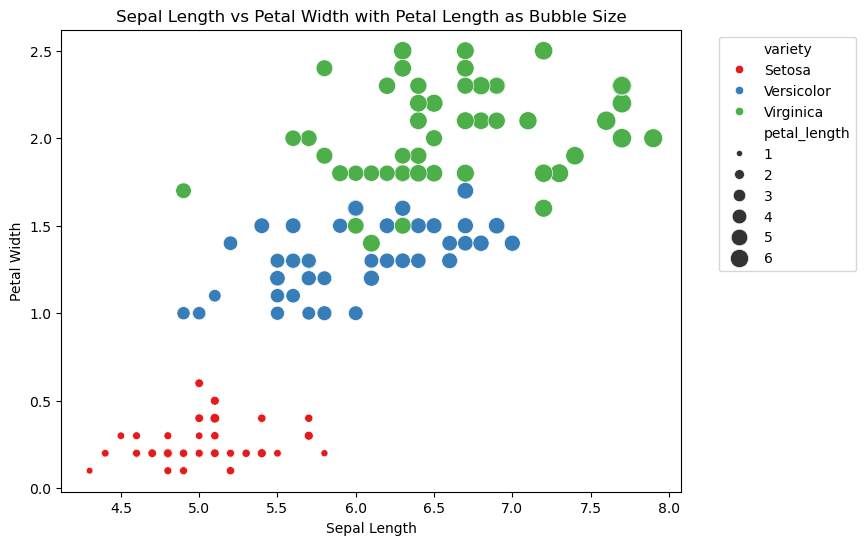

In [151]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal_length', y='petal_width', size='petal_length', hue='variety', data=iris, palette='Set1', sizes=(20, 200))
plt.title("Sepal Length vs Petal Width with Petal Length as Bubble Size")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

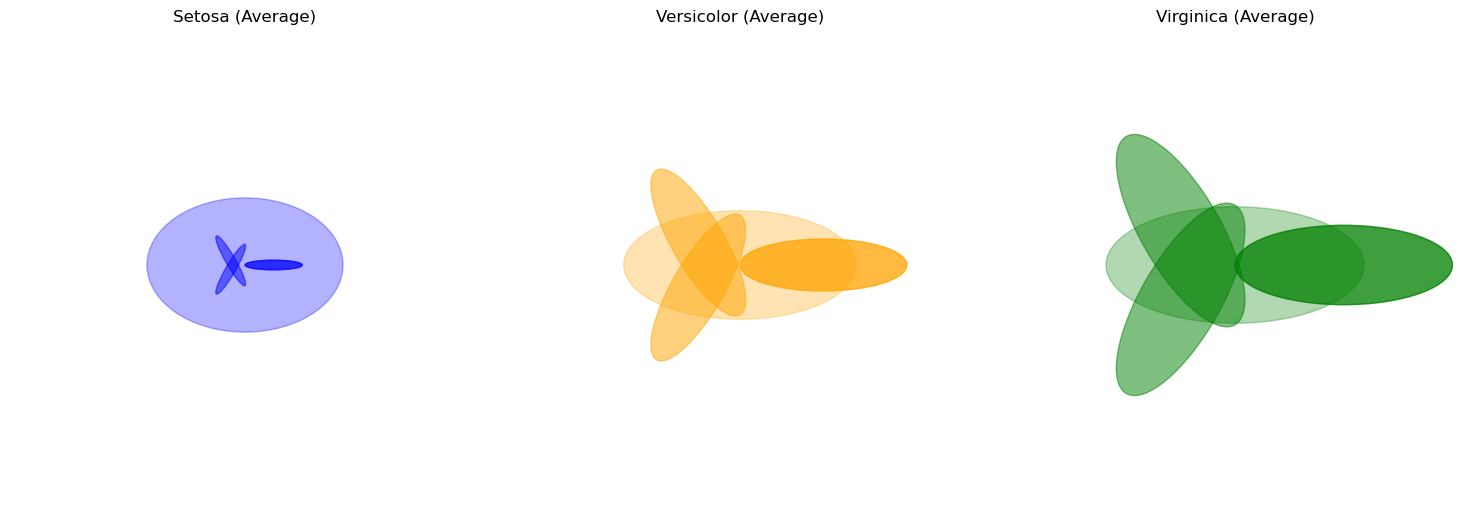

In [141]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

# Calculate average measurements for each species
iris_avg = iris.groupby('variety').mean()

# Function to draw a flower
def draw_flower(ax, sepal_length, sepal_width, petal_length, petal_width, color, title):
    # Draw sepals (outer layer)
    sepal = Ellipse((0, 0), width=sepal_length, height=sepal_width, angle=0, color=color, alpha=0.3, label='Sepal')
    ax.add_patch(sepal)

    # Draw petals (inner layer)
    for angle in np.linspace(0, 2 * np.pi, 4):  # 4 petals
        x = petal_length * np.cos(angle) / 2
        y = petal_width * np.sin(angle) / 2
        petal = Ellipse((x, y), width=petal_length, height=petal_width, angle=np.degrees(angle), color=color, alpha=0.5, label='Petal')
        ax.add_patch(petal)

    # Set limits and title
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.axis('off')

# Create a plot for each species
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Draw flowers for each species
for ax, (species, row) in zip(axes, iris_avg.iterrows()):
    draw_flower(
        ax,
        sepal_length=row['sepal_length'],
        sepal_width=row['sepal_width'],
        petal_length=row['petal_length'],
        petal_width=row['petal_width'],
        color='blue' if species == 'Setosa' else 'orange' if species == 'Versicolor' else 'green',
        title=f'{species} (Average)'
    )

plt.tight_layout()
plt.show()

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Test accuracy: 0.98


/var/folders/b1/jmw1t8k560b3ljdj7pzwl_kh0000gn/T/ipykernel_22242/256129455.py:57: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y == class_, 0], X[y == class_, 1],
/var/folders/b1/jmw1t8k560b3ljdj7pzwl_kh0000gn/T/ipykernel_22242/256129455.py:57: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y == class_, 0], X[y == class_, 1],
/var/folders/b1/jmw1t8k560b3ljdj7pzwl_kh0000gn/T/ipykernel_22242/2561294

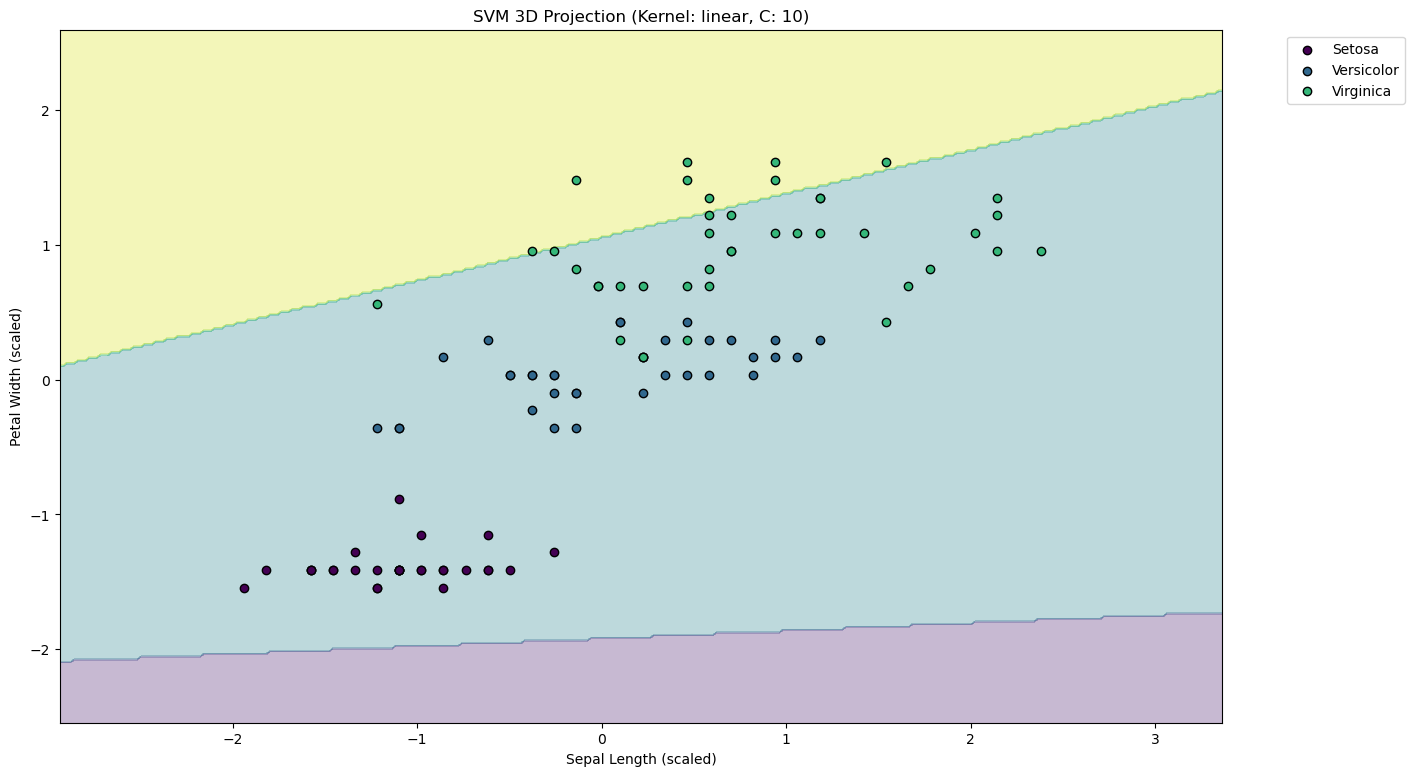

In [152]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Use 3 features: sepal_length, petal_width, and petal_length
X = iris[["sepal_length", "petal_width", "petal_length"]].values  # Added petal_length
y = iris["variety"].values

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=12)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto", 0.1, 1],
    "kernel": ["linear", "rbf", "poly"]
}

# Train SVM with cross-validation
svm = SVC(random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

# Best model
best_svm = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Test accuracy: {best_svm.score(X_test_scaled, y_test):.2f}")

def plot_decision_boundary_3d_projection(model, X, y, title):
    # Create meshgrid for two features (sepal_length, petal_width)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Fix the third feature (petal_length) at its mean
    zz = np.full_like(xx, X[:, 2].mean())
    
    # Predict class labels for the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision regions
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
    
    # Plot training points
    for i, class_ in enumerate(np.unique(y)):
        plt.scatter(X[y == class_, 0], X[y == class_, 1],
                    c=plt.cm.viridis(i/3), label=label_encoder.inverse_transform([class_])[0], edgecolor="k")
    
    # Add labels and title
    plt.xlabel("Sepal Length (scaled)")
    plt.ylabel("Petal Width (scaled)")
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot the optimized SVM (projection)
plt.figure(figsize=(15, 9))
plot_decision_boundary_3d_projection(best_svm, X_train_scaled, y_train, 
                                    f"SVM 3D Projection (Kernel: {best_svm.kernel}, C: {best_svm.C})")
plt.show()

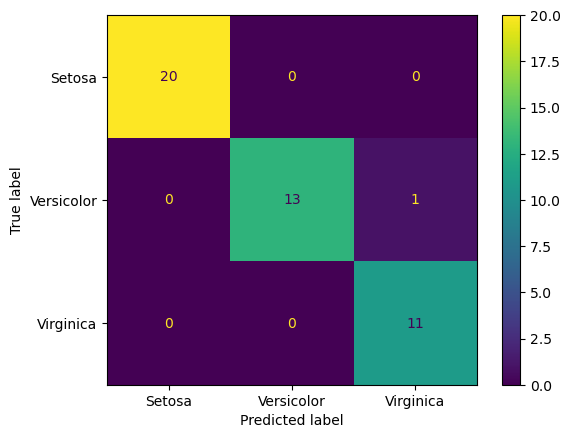

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = best_svm.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=label_encoder.classes_).plot()
plt.show()

In [157]:
from sklearn.metrics import classification_report

y_pred = best_svm.predict(X_test_scaled)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        20
  Versicolor       1.00      0.93      0.96        14
   Virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



In [144]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.datasets import load_iris

# # Load the Iris dataset
# iris = load_iris()
# X = iris.data[:, [1, 3]]  # Use sepal width and petal width for visualization
# y = iris.target

# # Encode class labels into numerical values
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# # Standardize features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Define parameter grid
# param_grid = {
#     "C": [0.1, 1, 10, 100],
#     "gamma": ["scale", "auto", 0.1, 1],
#     "kernel": ["linear", "rbf", "poly"]
# }

# # Train SVM with cross-validation
# svm = SVC(random_state=42, decision_function_shape='ovr')  # Use 'ovr' for multi-class
# grid_search = GridSearchCV(svm, param_grid, cv=5, scoring="accuracy")
# grid_search.fit(X_train_scaled, y_train)

# # Best parameters and model
# best_svm = grid_search.best_estimator_
# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Test accuracy: {best_svm.score(X_test_scaled, y_test):.2f}")

# # Function to plot 3D decision boundaries
# def plot_3d_decision_boundary(model, X, y, title):
#     # Create a meshgrid
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
#                          np.arange(y_min, y_max, 0.02))
    
#     # Predict decision function for the meshgrid
#     Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    
#     # For multi-class, take the maximum decision function value for each point
#     if len(Z.shape) > 1:  # Multi-class case
#         Z = np.max(Z, axis=1)  # Take the maximum decision value for each point
#     Z = Z.reshape(xx.shape)
    
#     # Compute decision function values for the training points
#     Z_train = model.decision_function(X)
#     if len(Z_train.shape) > 1:  # Multi-class case
#         Z_train = np.max(Z_train, axis=1)  # Take the maximum decision value for each point
    
#     # Create 3D plot
#     fig = plt.figure(figsize=(12, 8))
#     ax = fig.add_subplot(111, projection='3d')
    
#     # Plot the decision surface
#     ax.plot_surface(xx, yy, Z, cmap="viridis", alpha=0.5)
    
#     # Plot the training points
#     for i, class_ in enumerate(np.unique(y)):
#         ax.scatter(X[y == class_, 0], X[y == class_, 1], Z_train[y == class_],
#                    c=plt.cm.viridis(i/3), label=label_encoder.inverse_transform([class_])[0], edgecolor="k")
    
#     # Highlight support vectors
#     ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
#                model.decision_function(model.support_vectors_).max(axis=1), s=100,
#                facecolors="none", edgecolors="red", label="Support Vectors")
    
#     # Add labels and title
#     ax.set_xlabel("Sepal Width (scaled)")
#     ax.set_ylabel("Petal Width (scaled)")
#     ax.set_zlabel("Decision Function")
#     ax.set_title(title)
#     ax.legend()

# # Plot the optimized SVM in 3D
# plot_3d_decision_boundary(best_svm, X_train_scaled, y_train, 
#                           f"SVM 3D Decision Boundaries (Kernel: {best_svm.kernel}, C: {best_svm.C})")
# plt.show()